#<center><b><u>Social network analysis</u>
##Analyzing data from social networks can provide valuable insights into user behaviour, and content dynamics. Here's an outline of a data analytics project on social networks:

#####TASK 1.
User Engagement: Analyze user engagement metrics such as likes, comments, or shares. Identify highly engaged users or posts and explore factors influencing engagement. Visualize engagement patterns using bar charts, scatter plots, or heatmaps.

### 1. libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###2.Load dataset

In [ ]:
#import csv data to a Pandas DataFrame
data = pd.read_csv('tiktok.csv')

In [ ]:
#describing the dataset
data.describe()

,S.no
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [ ]:
data.head()

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K
1,2,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K
2,3,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K
3,4,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K
4,5,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K


In [ ]:
data.tail()

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
995,996,brendadialoy,Brenda Dialoy,371.9K,1.2M,187.5K,626,2K
996,997,jujufitcats,Juju Fitcats,4.3M,2.2M,280.8K,380,558
997,998,xoteam,XO Team,37.8M,2.5M,180.2K,859,450
998,999,kimsnwuo,️️,100.9K,957.4K,226.8K,908,1.7K
999,1000,jass_mcg,jass_mcg,52.2K,503.8K,116K,8.1K,1.8K


In [ ]:
data.shape

(1000, 8)

In [ ]:
# getting some inf.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.no           1000 non-null   int64 
 1   Tiktoker name  1000 non-null   object
 2   Tiktok name    999 non-null    object
 3   Subscribers    1000 non-null   object
 4   Views avg.     1000 non-null   object
 5   Likes avg.     1000 non-null   object
 6   Comments avg.  1000 non-null   object
 7   Shares avg.    1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


###3.Preprocessing The Data

In [ ]:
# check missing values
data.isnull().sum()

S.no             0
Tiktoker name    0
Tiktok name      1
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64

In [ ]:
#drop null value(raw)
data.dropna(inplace=True)

In [ ]:
data.shape

(999, 8)

In [ ]:
# check missing values
data.isnull().sum()

S.no             0
Tiktoker name    0
Tiktok name      0
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64

###4. Data Analysis

In [ ]:
data.sort_values(["Subscribers"],axis=0, ascending=False,inplace=True)

In [ ]:
data.head(10).style.set_properties(**{'background-color': 'blue'}, subset=['Subscribers'])

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
733,734,jomaryee,Jomar Yee,9M,2.3M,226.7K,1.3K,626
805,806,vivinovikaa,Vivi🧸,999.1K,1.6M,197.9K,1.7K,945
629,630,marilynl19,user1692838440296,995.2K,1.1M,162.3K,4.4K,2.5K
686,687,iniganta,Ganta,986.8K,1.3M,160.7K,3.3K,1.9K
653,654,guywithamoviecamera,reece,981.5K,1.4M,329K,1.1K,1.4K
856,857,dangthuhaf,Đặng Thu Hà,980.5K,2.5M,300.4K,672,341
367,368,irenehsuu,Irene,98.6K,1.4M,401.7K,1.3K,3.9K
610,611,_.anime.edits_0,video,97K,1.7M,75.6K,1.5K,8.7K
619,620,k4554ndr4,kassandra 🪐,978K,1M,280.4K,1.8K,2.7K
84,85,calfreezy,Calfreezy,960.6K,6.5M,869.1K,1.7K,2.4K


In [ ]:
data['Subscribers'] = data["Subscribers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [ ]:
# Top 10 Youtubers by Subscribers
sorted_df_Subscribers = data.sort_values(by='Subscribers', ascending=False)
top_Tiktok_name_by_Subscribers = sorted_df_Subscribers.head(10)
top_Tiktok_name_by_Subscribers

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
1,2,khaby.lame,Khabane lame,149200000,17.3M,2.3M,15.2K,8.7K
10,11,charlidamelio,charli d’amelio,146200000,15.2M,959.4K,20.8K,4.6K
74,75,bellapoarch,Bella Poarch,91400000,7.4M,677.3K,4.9K,1.1K
3,4,addisonre,Addison Rae,88700000,22M,906.6K,7.6K,26.2K
19,20,kimberly.loaiza,Kimberly Loaiza,67200000,8.8M,1.2M,12.1K,4.3K
326,327,cznburak,cznburak,63600000,4.6M,228.4K,2.3K,978
16,17,domelipa,domelipa,58100000,10.4M,1.5M,9.1K,3.5K
630,631,dixiedamelio,dixie,57400000,2.4M,220.5K,1.9K,424
6,7,therock,The Rock,55400000,13.1M,1.5M,14.3K,11.9K
497,498,lorengray,Loren Gray,54600000,3.1M,358.7K,879,761


In [ ]:
top_Tiktok_name_by_Subscribers['Subscribers'].info

<bound method Series.info of 1      149200000
10     146200000
74      91400000
3       88700000
19      67200000
326     63600000
16      58100000
630     57400000
6       55400000
497     54600000
Name: Subscribers, dtype: int64>

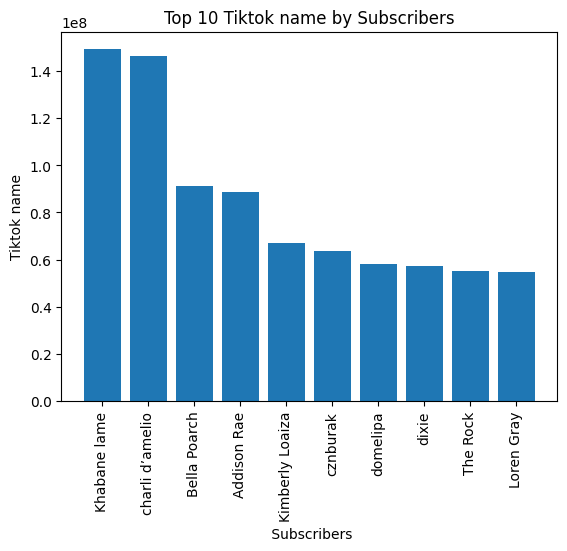

In [ ]:
plt.bar(height='Subscribers', x='Tiktok name', data=top_Tiktok_name_by_Subscribers)
plt.xlabel(' Subscribers')
plt.ylabel('Tiktok name')
plt.title("Top 10 Tiktok name by Subscribers")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data['Views avg.'] = data["Views avg."].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [ ]:
data.head(10).style.set_properties(**{'background-color': 'Red'}, subset=['Views avg.'])

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
39,40,lexibrookerivera,Lexi Rivera,23200000,7500000,992500,8500,1800
791,792,luisonfelix2,Luis Felix,395400,2300000,99500,1100,2800
770,771,jorgitoparrillero,Jorgito Parrillero,1400000,1500000,99500,333,6000
549,550,navacarlosss,Carlos Navarro 🥇,131300,1700000,98800,353,8900
927,928,zanfilms,Zan Films,1900000,2700000,98700,1200,1300
148,149,loganpaul,Logan Paul,15900000,4800000,976900,1400,1000
150,151,loganpaul,Logan Paul,15900000,4800000,976900,1400,1000
36,37,devankey,Devan Key,8000000,6900000,976200,8600,3700
49,50,jesusnalgas,jesus_nalgas,2600000,5000000,970100,6000,6000
718,719,maithana9er,Maithana9er,2100000,2500000,96000,2700,1700


In [ ]:
# Top 10 Tiktoker by Average views
sorted_df_Views_avg = data.sort_values(by='Views avg.', ascending=False)
top_Tiktok_name_by_Views_avg= sorted_df_Views_avg.head(10)
top_Tiktok_name_by_Views_avg

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
3,4,addisonre,Addison Rae,88700000,22000000,906600,7600,26200
2,3,scarlettsspam2,scarlett,2100000,17900000,845800,53900,6300
1,2,khaby.lame,Khabane lame,149200000,17300000,2300000,15200,8700
7,8,bizarrap,bzrp,5800000,16200000,2700000,4200,6900
10,11,charlidamelio,charli d’amelio,146200000,15200000,959400,20800,4600
4,5,belindatok,Belinda,4800000,14200000,1500000,14500,15300
30,31,rosalia,La Rosalia,25500000,14200000,1200000,3300,2600
35,36,winnermaxyt,WinnerMax,4500000,13800000,1000000,1800,4500
6,7,therock,The Rock,55400000,13100000,1500000,14300,11900
215,216,guide_smis,ไกค์ 'สมิท,275700,13100000,299200,435,1200


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3660 (\N{THAI CHARACTER THANTHAKHAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/py

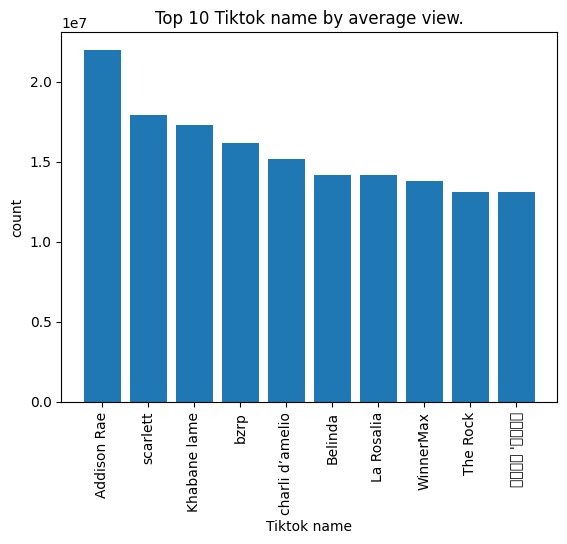

In [ ]:
plt.bar(height='Views avg.', x='Tiktok name', data=top_Tiktok_name_by_Views_avg)
plt.xlabel('Tiktok name')
plt.ylabel('count')
plt.title("Top 10 Tiktok name by average view.")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.sort_values(["Likes avg."],axis=0, ascending=False,inplace=True)

In [ ]:
data.head(10).style.set_properties(**{'background-color': 'Green'}, subset=['Likes avg.'])

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
7,8,bizarrap,bzrp,5800000,16200000,2700000,4200,6900
0,1,jypestraykids,Stray Kids,13800000,6400000,2300000,50200,34200
1,2,khaby.lame,Khabane lame,149200000,17300000,2300000,15200,8700
12,13,jetbentlee,Jet,3900000,12400000,2200000,3600,6600
5,6,onwardwanna,Wanna🥊,7500000,12000000,2000000,20400,4200
20,21,ramonvitor,ramonvitor,8700000,9300000,1900000,7300,2400
17,18,kyliejenner,Kylie Jenner,47000000,12300000,1900000,5500,2600
25,26,zeth,Zeth,13000000,8500000,1700000,2200,6200
9,10,mrbeast,MrBeast,42200000,13000000,1700000,17200,2100
47,48,pongamoslo_a_prueba,Pongámoslo a Prueba,36700000,9300000,1600000,2300,2000


In [ ]:
data['Likes avg.'] = data["Likes avg."].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [ ]:
# Top 10 Tiktoker by Average likes.
sorted_df_Likes_avg = data.sort_values(by='Likes avg.', ascending=False)
top_Tiktok_name_by_Likes_avg= sorted_df_Likes_avg.head(10)
top_Tiktok_name_by_Likes_avg

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
7,8,bizarrap,bzrp,5800000,16200000,2700000,4200,6900
1,2,khaby.lame,Khabane lame,149200000,17300000,2300000,15200,8700
0,1,jypestraykids,Stray Kids,13800000,6400000,2300000,50200,34200
12,13,jetbentlee,Jet,3900000,12400000,2200000,3600,6600
5,6,onwardwanna,Wanna🥊,7500000,12000000,2000000,20400,4200
20,21,ramonvitor,ramonvitor,8700000,9300000,1900000,7300,2400
17,18,kyliejenner,Kylie Jenner,47000000,12300000,1900000,5500,2600
25,26,zeth,Zeth,13000000,8500000,1700000,2200,6200
9,10,mrbeast,MrBeast,42200000,13000000,1700000,17200,2100
47,48,pongamoslo_a_prueba,Pongámoslo a Prueba,36700000,9300000,1600000,2300,2000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129354 (\N{BOXING GLOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


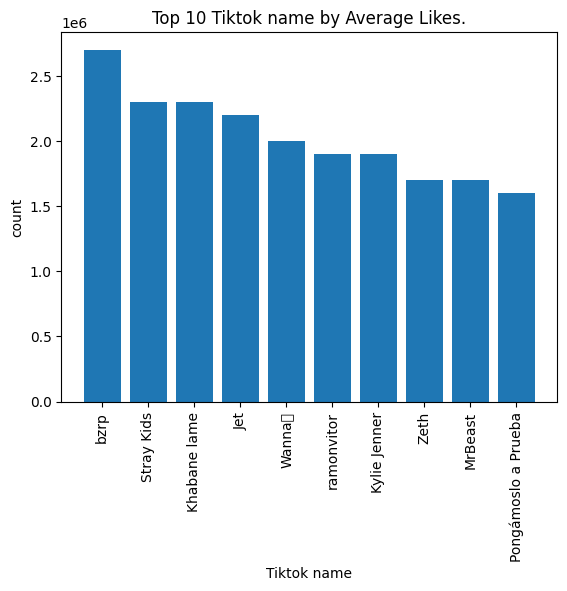

In [ ]:
plt.bar(height='Likes avg.', x='Tiktok name', data=top_Tiktok_name_by_Likes_avg)
plt.xlabel('Tiktok name')
plt.ylabel('count')
plt.title("Top 10 Tiktok name by Average Likes.")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.head(10).style.set_properties(**{'background-color': 'yellow'}, subset=['Comments avg.'])

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
39,40,lexibrookerivera,Lexi Rivera,23200000,7500000,992500,8.5K,1.8K
791,792,luisonfelix2,Luis Felix,395400,2300000,99500,1.1K,2.8K
770,771,jorgitoparrillero,Jorgito Parrillero,1400000,1500000,99500,333,6K
549,550,navacarlosss,Carlos Navarro 🥇,131300,1700000,98800,353,8.9K
927,928,zanfilms,Zan Films,1900000,2700000,98700,1.2K,1.3K
148,149,loganpaul,Logan Paul,15900000,4800000,976900,1.4K,1K
150,151,loganpaul,Logan Paul,15900000,4800000,976900,1.4K,1K
36,37,devankey,Devan Key,8000000,6900000,976200,8.6K,3.7K
49,50,jesusnalgas,jesus_nalgas,2600000,5000000,970100,6K,6K
718,719,maithana9er,Maithana9er,2100000,2500000,96000,2.7K,1.7K


In [ ]:
data['Comments avg.'] = data["Comments avg."].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [ ]:
# Top 10  Tiktoker by Average comments.
sorted_df_Comments_avg = data.sort_values(by='Comments avg.', ascending=False)
top_Tiktok_name_by_Comments_avg= sorted_df_Comments_avg.head(10)
top_Tiktok_name_by_Comments_avg

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
2,3,scarlettsspam2,scarlett,2100000,17900000,845800,53900,6.3K
0,1,jypestraykids,Stray Kids,13800000,6400000,2300000,50200,34.2K
26,27,kurtsworld,Kurt Kunkle,1300000,4900000,685900,30100,3.3K
21,22,txt.bighitent,TOMORROW X TOGETHER,18100000,3800000,1100000,27400,9.5K
113,114,jwaltonnn,ᴊ⚡️,733400,1600000,350900,27000,2.5K
18,19,enhypen,enhypen,12700000,4300000,1100000,24800,14.3K
24,25,mtarek.official3,Mohamed Tarek - محمد طارق,1300000,4700000,864200,21900,8K
10,11,charlidamelio,charli d’amelio,146200000,15200000,959400,20800,4.6K
5,6,onwardwanna,Wanna🥊,7500000,12000000,2000000,20400,4.2K
8,9,landonbarkerr,Landon Barker,3800000,11700000,1200000,19100,15.2K


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129354 (\N{BOXING GLOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


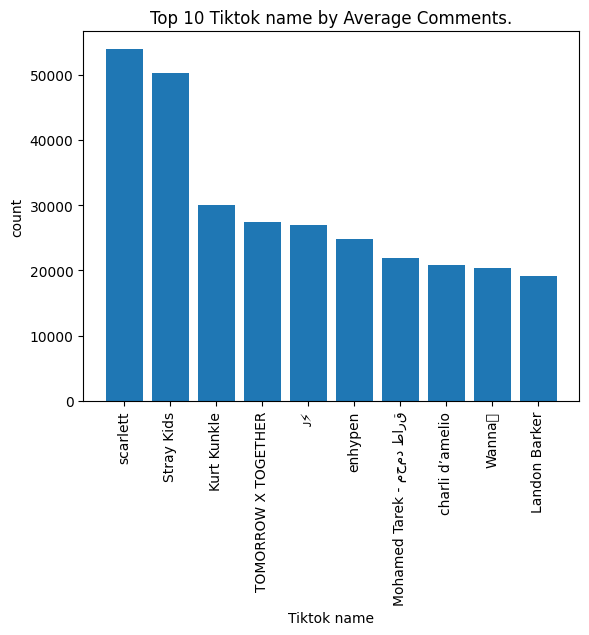

In [ ]:
plt.bar(height='Comments avg.', x='Tiktok name', data=top_Tiktok_name_by_Comments_avg)
plt.xlabel('Tiktok name')
plt.ylabel('count')
plt.title("Top 10 Tiktok name by Average Comments.")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.head(10).style.set_properties(**{'background-color': 'grey'}, subset=['Shares avg.'])

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
39,40,lexibrookerivera,Lexi Rivera,23200000,7500000,992500,8500,1.8K
791,792,luisonfelix2,Luis Felix,395400,2300000,99500,1100,2.8K
770,771,jorgitoparrillero,Jorgito Parrillero,1400000,1500000,99500,333,6K
549,550,navacarlosss,Carlos Navarro 🥇,131300,1700000,98800,353,8.9K
927,928,zanfilms,Zan Films,1900000,2700000,98700,1200,1.3K
148,149,loganpaul,Logan Paul,15900000,4800000,976900,1400,1K
150,151,loganpaul,Logan Paul,15900000,4800000,976900,1400,1K
36,37,devankey,Devan Key,8000000,6900000,976200,8600,3.7K
49,50,jesusnalgas,jesus_nalgas,2600000,5000000,970100,6000,6K
718,719,maithana9er,Maithana9er,2100000,2500000,96000,2700,1.7K


In [ ]:
data['Shares avg.'] = data["Shares avg."].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [ ]:
# Top 10 Tiktoker by Average shares.
sorted_df_Shares_avg = data.sort_values(by='Shares avg.', ascending=False)
top_Tiktok_name_by_Shares_avg= sorted_df_Shares_avg.head(10)
top_Tiktok_name_by_Shares_avg

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
54,55,musikyotogsj,うさっくま♡Movie,1200000,4300000,192000,1800,55900
93,94,oficialmarcuseni,marcus_eni,4500000,2200000,198600,1300,46000
104,105,ivanlomelitv,Iván Lomeli Travel Blogger,44000,2400000,188100,1200,39600
0,1,jypestraykids,Stray Kids,13800000,6400000,2300000,50200,34200
882,883,hf37777,نجم الثرياء⭐H,455300,1100000,17600,5800,31900
172,173,livefromthepark,Ninjy Dave,369000,2200000,130199,1000,30600
129,130,bargain.bethany,bargainbethany,124800,2200000,208700,1800,28300
102,103,paansih16,gustian_magrib,1100000,2900000,230500,1200,27700
13,14,kervo.dolo,Kervo.dolo,10300000,5700000,1300000,7900,27600
3,4,addisonre,Addison Rae,88700000,22000000,906600,7600,26200


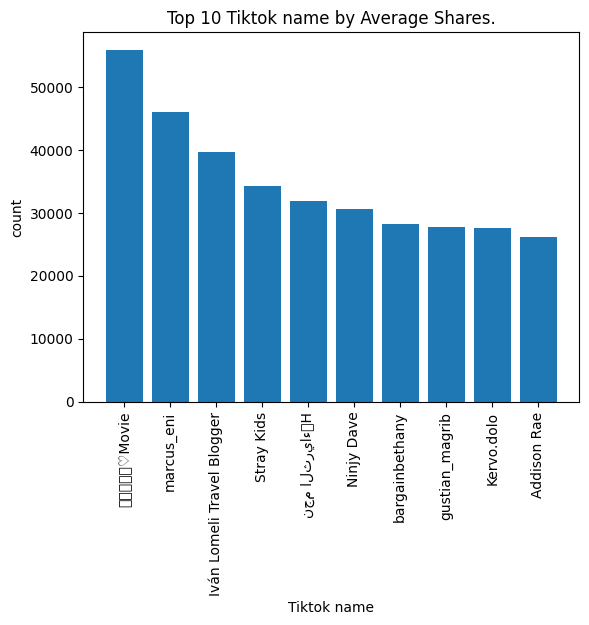

In [ ]:
plt.bar(height='Shares avg.', x='Tiktok name', data=top_Tiktok_name_by_Shares_avg)
plt.xlabel('Tiktok name')
plt.ylabel('count')
plt.title("Top 10 Tiktok name by Average Shares.")
plt.xticks(rotation = 90)
plt.show()

compersion between highest no of subscriber and lowest number of subscriber by tiktok name..

# Testing the correlation

<ipython-input-35-d75231c6982c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationA = data. iloc[:,1:8].corr(method = 'pearson')


[Text(0.5, 0, 'Subscribers'),
 Text(1.5, 0, 'Views avg.'),
 Text(2.5, 0, 'Likes avg.'),
 Text(3.5, 0, 'Comments avg.'),
 Text(4.5, 0, 'Shares avg.')]

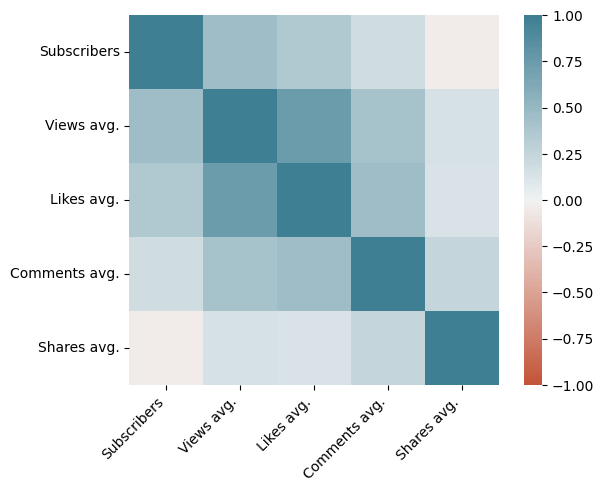

In [ ]:
correlationA = data. iloc[:,1:8].corr(method = 'pearson')
correlationA

ax = sns.heatmap(
    correlationA,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n = 200),
    square=True,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
data.dtypes

S.no              int64
Tiktoker name    object
Tiktok name      object
Subscribers       int64
Views avg.        int64
Likes avg.        int64
Comments avg.     int64
Shares avg.       int64
dtype: object